In [27]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, fixed
from IPython.display import display

%matplotlib inline

wave = thinkdsp.read_wave('splash.wav')
wave.normalize()
wave.make_audio()

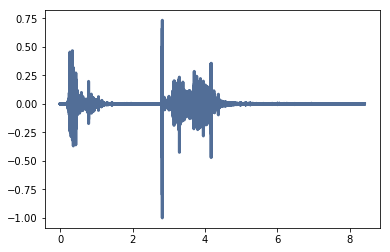

In [29]:
wave.plot()

In [31]:
segment = wave.segment(start=1.1, duration=0.3)
segment.make_audio()

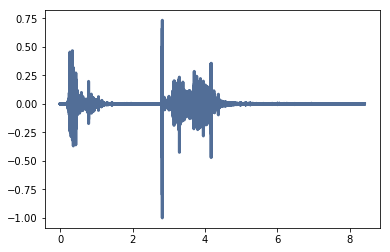

In [33]:
wave.plot()

In [34]:
segment = wave.segment(start=1.1, duration=0.3)
segment.make_audio()

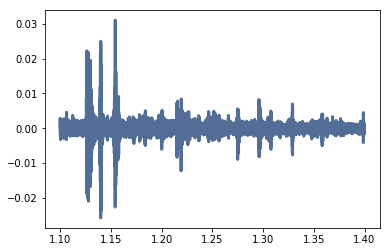

In [35]:
segment.plot()

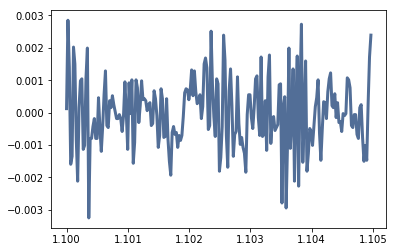

In [36]:
segment.segment(start=1.1, duration=0.005).plot()

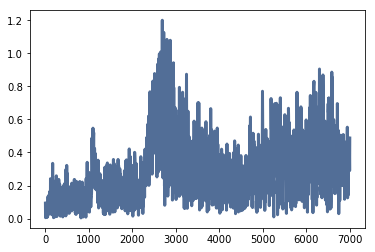

In [37]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)

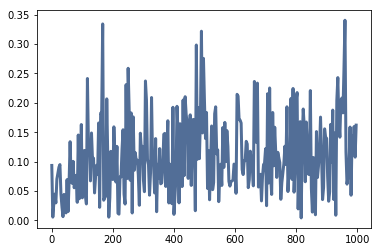

In [39]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)

In [40]:
spectrum.peaks()[:30]

[(1.1999478806155586, 2686.666666666667),
 (1.1268832700767923, 2720.0),
 (1.0841485635334414, 2793.3333333333335),
 (1.0788987098060394, 2870.0),
 (1.0586481486413242, 2796.666666666667),
 (1.0076760935520501, 2646.666666666667),
 (1.0051851388580046, 2760.0),
 (0.99693745790357424, 2620.0),
 (0.97453364748766402, 2683.3333333333335),
 (0.97015130736305411, 2613.3333333333335),
 (0.9665389470400868, 2713.3333333333335),
 (0.95437137768625457, 2690.0),
 (0.95328262758188598, 2860.0),
 (0.95196859169786285, 2680.0),
 (0.94960840293112669, 2653.3333333333335),
 (0.94260982031402674, 2943.3333333333335),
 (0.93663336706056366, 2616.666666666667),
 (0.93438606146476544, 2580.0),
 (0.92933897633219575, 2693.3333333333335),
 (0.92474820519673273, 2863.3333333333335),
 (0.92267276098440487, 2716.666666666667),
 (0.91676183254066379, 2726.666666666667),
 (0.90771442339518749, 2650.0),
 (0.90764184176421481, 2753.3333333333335),
 (0.90487372595499382, 6300.0),
 (0.88605526669920698, 6583.333333

In [43]:
spectrum.low_pass(2000)

In [45]:
spectrum.make_wave().make_audio()

In [48]:
def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    thinkplot.config(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

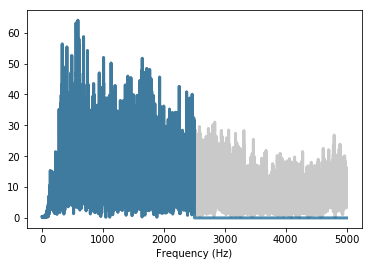

In [49]:
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));